<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series Independent Practice

_Authors:_

---

In [3]:
import pandas as pd
import numpy as np

%matplotlib inline

## Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:

* Store - the store number
* Dept - the department number
* Date - the week
* Weekly_Sales - sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week

### 1) Preprocess the data using Pandas
* **Load the data**
* **Convert the `Date` column to a `datetime` object**
* **Set the `Date` as the index of the dataframe**

In [6]:
walmart = pd.read_csv('data/train.csv')

In [7]:
walmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
walmart.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [10]:
walmart['Date'] = pd.to_datetime(walmart['Date'])

In [11]:
walmart.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [12]:
walmart.set_index('Date', inplace=True)

In [13]:
walmart.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


### 2) Filter the dataframe to Store 1 sales and aggregate over departments to compute the total weekly sales per store. Store this in a new Dataframe.

In [19]:
store1 = walmart[walmart.Store == 1][['Weekly_Sales']].resample('W', 'sum')

/Users/nicholebennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [20]:
store1.head()

,Weekly_Sales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68


### 3) Plot the rolling_mean for Weekly_Sales. What general trends do you observe?

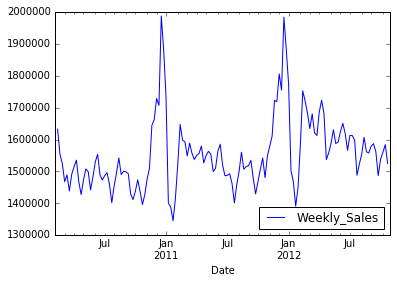

In [24]:
store1[['Weekly_Sales']].rolling(window = 3, center = True).mean().plot()

### 4) Computet the 1, 2, 52 autocorrelations for Weekly_Sales and/or create an autocorrelation plot.

In [27]:
print('Autocorrelation 1: ', store1['Weekly_Sales'].autocorr(1))
print('Autocorrelation 3: ', store1['Weekly_Sales'].autocorr(3))
print('Autocorrelation 52: ', store1['Weekly_Sales'].autocorr(52))

Autocorrelation 1:  0.302158279411
Autocorrelation 3:  0.0597992350667
Autocorrelation 52:  0.895376029478


/Users/nicholebennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


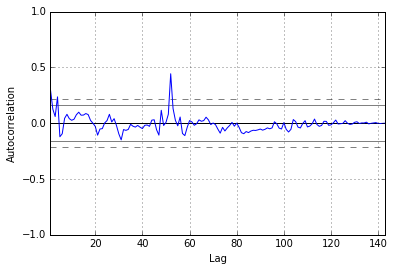

In [32]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(store1['Weekly_Sales'])

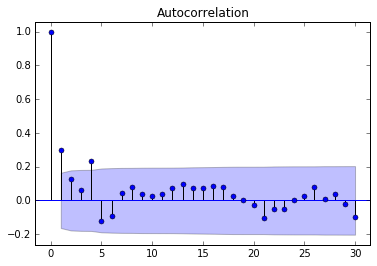

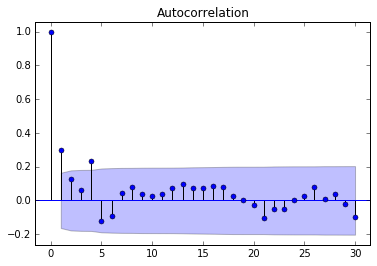

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(store1['Weekly_Sales'], lags=30)

# Components 1 and 2 seem particularly useful for autoregression, perhaps up to 4
# In the plot above notice, spike at around 52 - implying a yearly pattern as well
# No random spikes, probably not much use for a moving average model

### 5) Create a decomposition plot for the Store 1 sales data. 

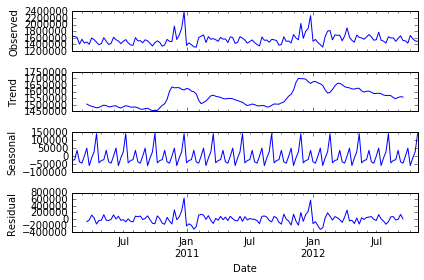

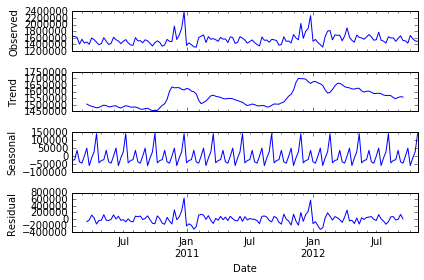

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(store1.Weekly_Sales, freq=12)   
decomposition.plot()  